# Polynomial Curve Fitting
## 1. Simulation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
"""
N: sample size
sigma: standard deviation
x: real-valued input (independent variable)
t: real-valued target (dependent variable)
"""

N = 10 # training set comprising N=10 data points (sample size)
sigma = 0.25
x = np.linspace(0, 1, N) # the input data set x was generated by choosing values of xn, for n=1,...,N, spaced uniformly in range [0,1]
t = np.sin(2 * np.pi * x) + sigma * np.random.randn(N) # the target data set t was obtained by first computing the corresponding values of the function sin(2*pi*x) and then adding a small level of random noise having a Gaussian distribution to each such point in order to obtain the corresponding value tn; add noise with sigma and random

In [3]:
"""
xsin: independent variable
ysin: dependent variable
x_polynomial: to adjust the points and make a smooth shape
"""
xsin = np.linspace(0, 1, 100)
tsin = np.sin(2*np.pi*xsin)
x_polynomial = np.linspace(0, 1, 100)

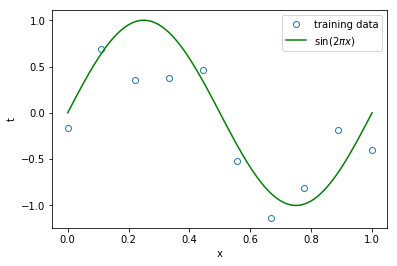

In [4]:
fig, ax = plt.subplots()
ax.plot(x, t, '.', marker = 'o', markerfacecolor = "none", label="training data")
ax.plot(xsin, tsin, '-', color = 'green', label="$\sin(2\pi x)$")
ax.set(xlabel = 'x', ylabel = 't')
plt.legend()
plt.show()

## 2. Polynomial Curve Fitting

In [5]:
def get_w(x, t, M): # part of exercise 2.b / y(x,w)
    """
    Function to obtain the w vector by fitting a M-th order polynomial.
    
    Input:
        x: [Array] independent variable
        t: [Array] dependent variable
        M: [Integer] Polynomial order
        
    Ouput:
        w: [Array] w vector
    """
    
    # 1. Obtain the matrix A
    A = np.zeros((M+1, M+1))
    for i in range(M + 1):
        for j in range(M + 1):
            A[i, j] = (x ** (i+j)).sum() #Creating the A matrix
            
    # 2. Obtain the matrix B
    B = np.zeros((M+1))
    for i in range(M+1):
        B[i] = ((x**i) * t).sum()
        
    # 3. Obtaining the inverse of A
    A_inv = np.linalg.inv(A)
    
    # 4. Obtaining the vector w (w =  A^-1 B)
    w = A_inv @ B # np.matmul(A_inv, B)
    
    return w

 <img src="Proof.png" alt="Proof">

In [6]:
def t_predictor(x, w, M):
    """
    Function to obtain a prediction for the fitted points using the Sum-of-Squares Error Function depending 
    on the polynomial order
    
    Input:
        x: [Array] training independent variable
        w: [Array] polynomial coefficient, vector
        M: [Integer] polynomial order
        
    Output:
        t: [Array] predicted fitted points over the y axis, vector
    """
    t = [w[i] * (x**i) for i in range(M+1)]
    t = np.array(t)
    t = sum(t)
    return t

In [7]:
def error(t_prediction, t_real):
    """
    Function to get Least Squared Error & Root-Mean-Square Error
    
    Input:
        t_prediction: [array] observed t values
        t_real: [array] real values of t
        
    Output:
        np.sqrt((2*error)/N): Returns the root-mean-squared error value
    """
    error = (((t_prediction - t_real)**2).sum()/2) # Least Squared Error
    return np.sqrt((2*error)/N) # Root-Mean-Square Error

## 3. Making a prediction

Magnitude of polynomial coefficients of order 0 are: [-0.13367426]


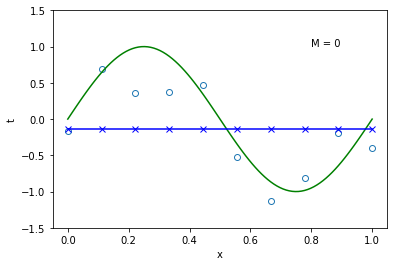

Magnitude of polynomial coefficients of order 1 are: [ 0.39920874 -1.06576601]


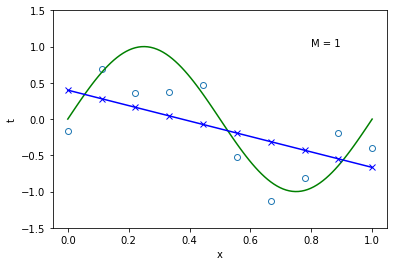

Magnitude of polynomial coefficients of order 3 are: [ -0.07080022   6.94396667 -21.41865858  14.40481429]


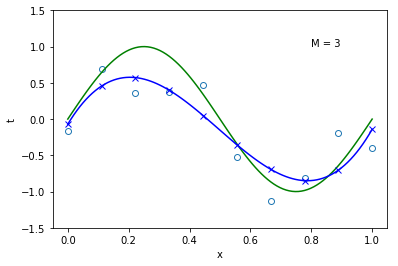

Magnitude of polynomial coefficients of order 6 are: [-1.48749095e-01  2.10281072e+01 -2.02510490e+02  8.51030582e+02
 -1.73787622e+03  1.65072904e+03 -5.82668583e+02]


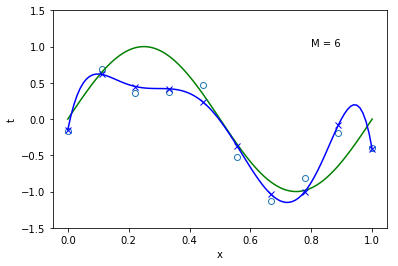

Magnitude of polynomial coefficients of order 9 are: [-1.63260596e-01 -4.62808187e+01  1.42557347e+03 -1.42507632e+04
  7.01558880e+04 -1.94212321e+05  3.16921470e+05 -3.02693021e+05
  1.56640668e+05 -3.39414458e+04]


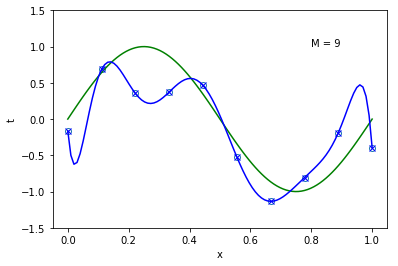

In [8]:
orders = [0, 1, 3, 6, 9]
rms_error = []

for i in range(len(orders)):
    M = orders[i]
    w = get_w(x, t, M)
    t_prediction = t_predictor(x, w, M)
    polynomial_prediction = t_predictor(x_polynomial, w, M)
    rms_error.append(error(t_prediction, t))
    print('Magnitude of polynomial coefficients of order ' + str(M) + ' are: ' + str(w)) # output for exercise 2.b
    fig, ax = plt.subplots()
    ax.plot(x, t, '.', marker = 'o', markerfacecolor = "none", label="training data")
    ax.plot(xsin, tsin, '-', color = 'green', label="$\sin(2\pi x)$")
    ax.plot(x, t_prediction, 'x', color='blue', label='M = ' + str(M) + ' [fitting]')
    ax.plot(x_polynomial, polynomial_prediction, '-', color='blue')
    ax.set(xlabel = 'x', ylabel = 't')
    ax.set_ylim(-1.5, 1.5)
    ax.annotate("M = "+str(M), xy=(0.8, 1))
    plt.show()

In [9]:
#Root-mean-squared error by degree
erms = pd.DataFrame(rms_error, index=orders, columns=['ERMS'])
erms

,ERMS
0,0.566227
1,0.452686
3,0.289892
6,0.123954
9,0.000091


## 4. Comparison between Root-Mean-Squared Error and Degree

In [10]:
N = 20
sigma = 0.25
x = np.linspace(0, 1, N) 
t = np.sin(2 * np.pi * x) + sigma * np.random.randn(N)

In [11]:
# Create the training dataset and testing dataset with 70% and 30%
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3)

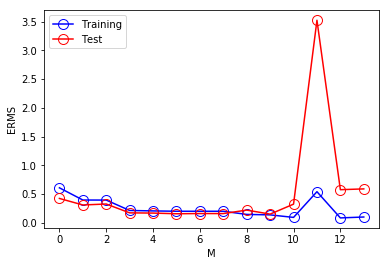

In [12]:
training_error = []
test_error = []

for i in range(14):
    M = i
    w = get_w(x_train, t_train, M)
    training_prediction = t_predictor(x_train, w, M)
    test_prediction = t_predictor(x_test, w, M)
    training_error.append(error(training_prediction, t_train))
    test_error.append(error(test_prediction, t_test))
    
fig, ax = plt.subplots()
ax.plot(training_error,  'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
ax.plot(test_error, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
ax.set(xlabel = 'M', ylabel = 'ERMS')  
plt.legend()
plt.show()

## 5. Reducing over-fitting as size of the data set increases

In [13]:
M = 9

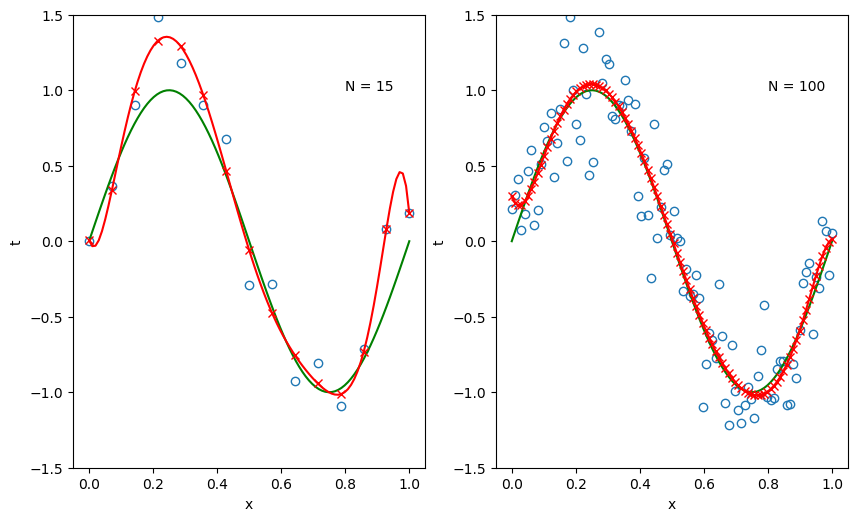

In [14]:
N = 15 # training set comprising N=15 data points (sample size)
sigma = 0.25
x = np.linspace(0, 1, N) # the input data set x was generated by choosing values of xn, for n=1,...,N, spaced uniformly in range [0,1]
t = np.sin(2 * np.pi * x) + sigma * np.random.randn(N)
x_polynomial = np.linspace(0,1,100)

w = get_w(x, t, M)
t_prediction = t_predictor(x, w, M)
rms_15 = error(t_prediction, t)
polynomial_prediction = t_predictor(x_polynomial, w, M)

fig, axs = plt.subplots(1, 2, figsize=[10,6], dpi=100)
ax = axs[0]
ax.plot(x, t, '.', marker = 'o', markerfacecolor = "none", label="training data")
ax.plot(xsin, tsin, '-', color = 'green', label="$\sin(2\pi x)$")
ax.plot(x, t_prediction, 'x', color='red', label='M = ' + str(M) + ' [fitting]')
ax.plot(x_polynomial, polynomial_prediction, '-', color='red')
ax.set(xlabel = 'x', ylabel = 't')
ax.set_ylim(-1.5, 1.5)      
ax.annotate("N = 15", xy=(0.8, 1))
ax = axs[1]

N = 100
sigma = 0.25
x = np.linspace(0, 1, N)
t = np.sin(2 * np.pi * x) + sigma * np.random.randn(N)

w = get_w(x, t, M)
t_prediction = t_predictor(x, w, M)
rms_100 = error(t_prediction, t)
polynomial_prediction = t_predictor(x_polynomial, w, M)


ax.plot(x, t, '.', marker = 'o', markerfacecolor = "none")
ax.plot(xsin, tsin, '-', color = 'green')
ax.plot(x, t_prediction, 'x', color='red')
ax.plot(x_polynomial, polynomial_prediction, '-', color='red')
ax.set(xlabel = 'x', ylabel = 't')
ax.set_ylim(-1.5, 1.5)    
ax.annotate("N = 100", xy=(0.8, 1))
plt.show()

In [15]:
# Root-mean-squared error values per size of the data
erms = pd.DataFrame({
    "ERMS": [rms_15, rms_100]},
    index = [15, 100])
erms

,ERMS
15,0.125711
100,0.250003


## 6. Applying the learned

In [16]:
df = pd.read_fwf('Auto.data')
df.to_csv('log.csv')

In [17]:
auto = pd.read_csv('log.txt.csv',sep = ',')

In [18]:
auto.horsepower = auto.horsepower.str.replace('?','NaN').astype(float)

In [19]:
auto.horsepower.fillna(auto.horsepower.mean(),inplace=True)

In [20]:
auto.horsepower = auto.horsepower.astype(int)

In [21]:
#To know the size of the data set in order to make our simulation 
auto.size

3573

## 6.1 Mileage as function of horsepower 

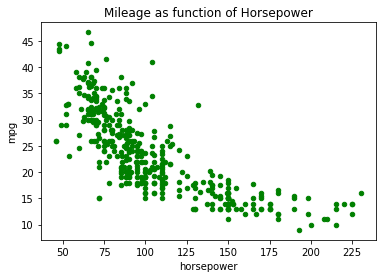

In [22]:
auto.plot(x = 'horsepower',y = 'mpg',kind = 'scatter', color = 'green',title = 'Mileage as function of Horsepower')
plt.show()

In [23]:
N = auto.size
x = auto['horsepower']
t = auto['mpg']
x_polynomial = np.linspace(0,1,auto.size)

In [24]:
# Create the training dataset and testing dataset with 70% and 30%
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3)

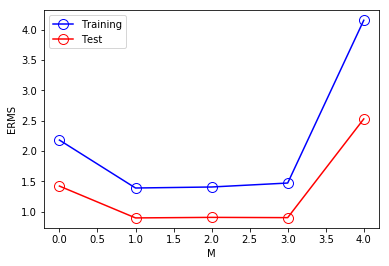

In [25]:
training_error = []
test_error = []
for i in range(5):
    M = i
    w = get_w(x_train, t_train, M)
    training_prediction = t_predictor(x_train, w, M)
    test_prediction = t_predictor(x_test, w, M)
    training_error.append(error(training_prediction, t_train))
    test_error.append(error(test_prediction, t_test))
    
fig, ax = plt.subplots()
ax.plot(training_error,  'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
ax.plot(test_error, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
ax.set(xlabel = 'M', ylabel = 'ERMS')  
plt.legend()
plt.show()

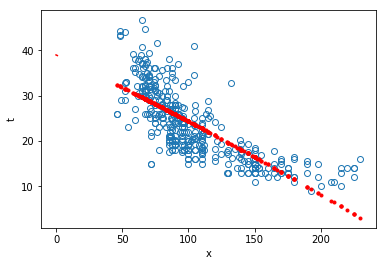

Root-Mean-Square Error of order 2 is: 1.6777843076793588


In [26]:
M = 2
w = get_w(x, t, M)
t_prediction = t_predictor(x, w, M)
polynomial_prediction = t_predictor(x_polynomial, w, M)
rms_error = error(t_prediction, t)

fig, ax = plt.subplots()
ax.plot(x, t, '.', marker = 'o', markerfacecolor = "none", label="training data")
ax.plot(x, t_prediction, '.', color='red', label='M = ' + str(M) + ' [fitting]')
ax.plot(x_polynomial, polynomial_prediction, '-', color='red', label='M = ' + str(M) + ' [fitting]')
ax.set(xlabel = 'x', ylabel = 't')
plt.show()
print('Root-Mean-Square Error of order ' + str(M) + ' is: ' + str(rms_error))

## 6.2 Mileage as a function of Displacement

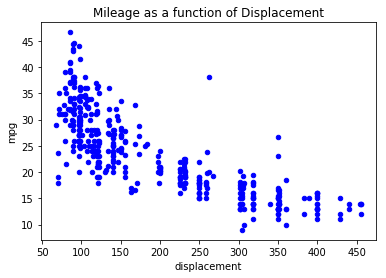

In [27]:
auto.plot(x = 'displacement',y = 'mpg',kind = 'scatter', color = 'blue',title = 'Mileage as a function of Displacement')
plt.show()

In [28]:
N = auto.size
x = auto['displacement']
t = auto['mpg']

In [29]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3)

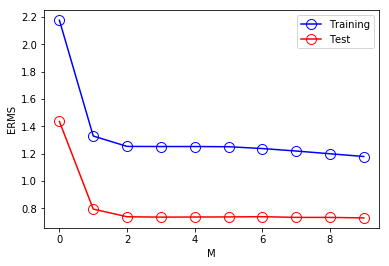

In [30]:
training_error = []
test_error = []
for i in range(10):
    M = i
    w = get_w(x_train, t_train, M)
    training_prediction = t_predictor(x_train, w, M)
    test_prediction = t_predictor(x_test, w, M)
    training_error.append(error(training_prediction, t_train))
    test_error.append(error(test_prediction, t_test))
    
fig, ax = plt.subplots()
ax.plot(training_error,  'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
ax.plot(test_error, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
ax.set(xlabel = 'M', ylabel = 'ERMS')  
plt.legend()
plt.show()

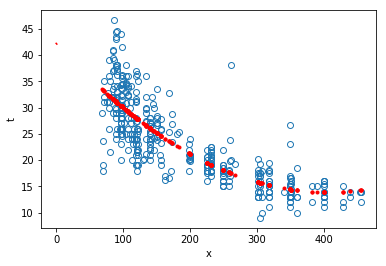

Root-Mean-Square Error of order 2 is: 1.4538994691862321


In [31]:
M = 2
w = get_w(x, t, M)
t_prediction = t_predictor(x, w, M)
polynomial_prediction = t_predictor(x_polynomial, w, M)
rms_error = error(t_prediction, t)

fig, ax = plt.subplots()
ax.plot(x, t, '.', marker = 'o', markerfacecolor = "none", label="training data")
ax.plot(x, t_prediction, '.', color='red', label='M = ' + str(M) + ' [fitting]')
ax.plot(x_polynomial, polynomial_prediction, '-', color='red', label='M = ' + str(M) + ' [fitting]')
ax.set(xlabel = 'x', ylabel = 't')
plt.show()
print('Root-Mean-Square Error of order ' + str(M) + ' is: ' + str(rms_error))

## 6.3 Horsepower as function of Weight

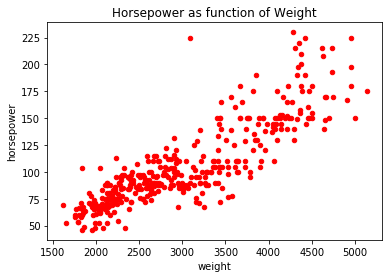

In [32]:
auto.plot(x = 'weight',y = 'horsepower',kind = 'scatter', color = 'red',title = 'Horsepower as function of Weight')
plt.show()

In [33]:
N = auto.size
x = auto['weight']
t = auto['horsepower']

In [34]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3)

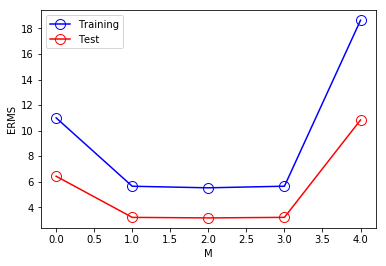

In [35]:
training_error = []
test_error = []
for i in range(5):
    M = i
    w = get_w(x_train, t_train, M)
    training_prediction = t_predictor(x_train, w, M)
    test_prediction = t_predictor(x_test, w, M)
    training_error.append(error(training_prediction, t_train))
    test_error.append(error(test_prediction, t_test))
    
fig, ax = plt.subplots()
ax.plot(training_error,  'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
ax.plot(test_error, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
ax.set(xlabel = 'M', ylabel = 'ERMS')  
plt.legend()
plt.show()

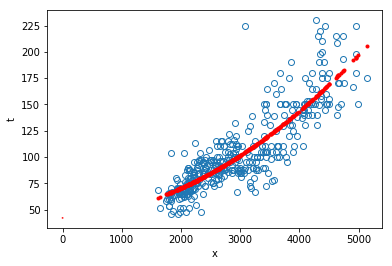

Root-Mean-Square Error of order 2 is: 6.353284898317613


In [36]:
M = 2
w = get_w(x, t, M)
t_prediction = t_predictor(x, w, M)
polynomial_prediction = t_predictor(x_polynomial, w, M)
rms_error = error(t_prediction, t)

fig, ax = plt.subplots()
ax.plot(x, t, '.', marker = 'o', markerfacecolor = "none", label="training data")
ax.plot(x, t_prediction, '.', color='red', label='M = ' + str(M) + ' [fitting]')
ax.plot(x_polynomial, polynomial_prediction, '-', color='red', label='M = ' + str(M) + ' [fitting]')
ax.set(xlabel = 'x', ylabel = 't')
plt.show()
print('Root-Mean-Square Error of order ' + str(M) + ' is: ' + str(rms_error))